# Modelação de sistemas térmicos usando modelos de primeira ordem

In [235]:
# bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Obtenção das Respostas ao Degrau dos Sistemas Térmicos

 **Alínea a)**

Curva de resposta da temperatura do sistema térmico S1 para uma entrada em degrau de amplitude de 50% do duty cycle.

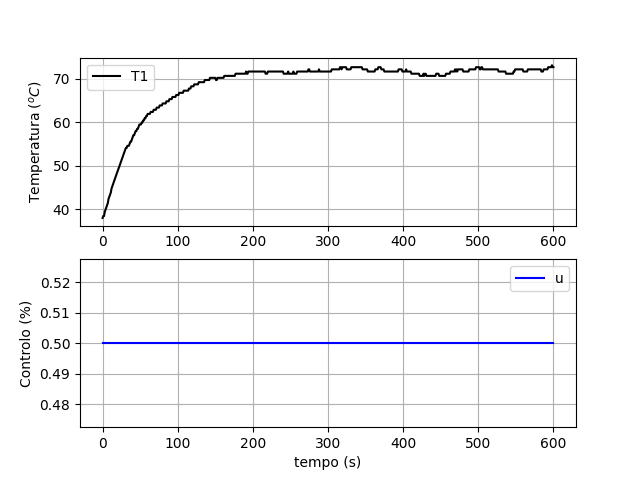

In [236]:
from IPython.display import Image
Image(filename='degrau_S1.png') 

Comentário:

 **Alínea b)**

Curva de resposta da temperatura do sistema térmico S2 para uma entrada em degrau de amplitude de 50% do duty cycle.

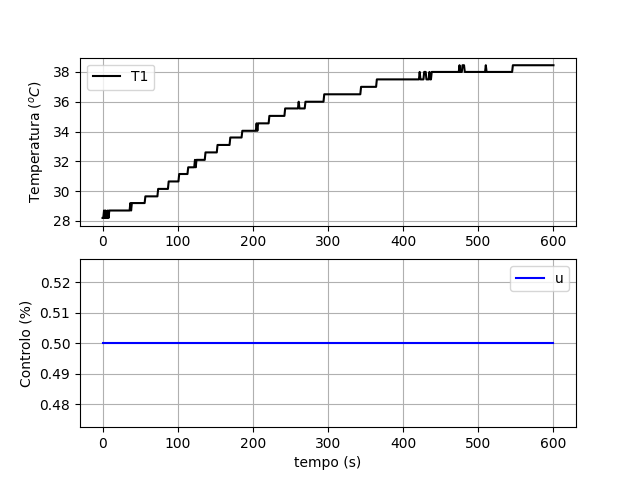

In [237]:
from IPython.display import Image
Image(filename='degrau_S2.png') 

Comentário:

# Sistema de Primeira Ordem - S1

In [238]:
# Carregar dados
dados = np.loadtxt('dados_S1.txt',delimiter=',')

t = dados[:,0]  # tempo
u = dados[:,1]  # entrada
y = dados[:,2]  # saída
mt = 0
i = 0

# Dados
# print(t)
# print(u)
# print(y)

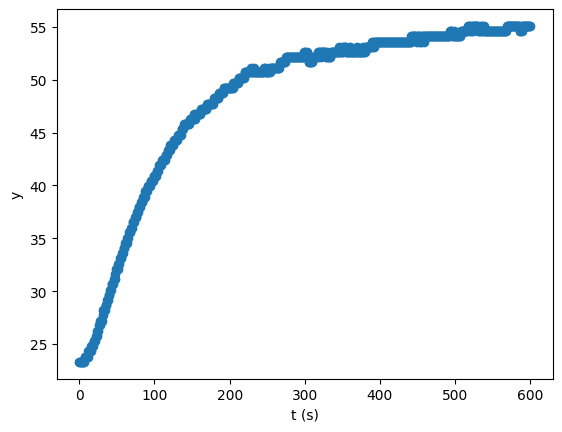

In [239]:
# Gráfico
plt.plot(t,y,'o')
plt.xlabel('t (s)')
plt.ylabel('y')
plt.show()

Método de ajuste dos parâmetros do modelo, $K$ e $\tau$, usando o ponto correspondente a 63.2% da variação final da resposta ao degrau

In [240]:
delta_u = dados[1,1] #50% pwm

# Ganho
K = (y[len(y)-1]-y[0])/delta_u

# Constante de tempo
y63 = (y[len(y)-1]-y[0])*0.632+y[0]
f = interp1d(y,t)
tau = f(y63)

Resposta do modelo de primeira ordem

$y(t) = y(0)+K\Delta_u(1-e^{\frac{-t}{\tau}})$

In [241]:
# Resposta do modelo
ym = y[0]+ K*delta_u*(1-np.exp(-t/tau))

# SSE
desvio2 = (y-ym)**2
SSE = np.sum(desvio2)

# Tss
Tss = np.mean(y[550:600])

# Delta_T
delta_t=Tss-y[0]

**Alínea c)**

In [242]:
# Parâmetros

print(f'T0: {y[0]} ºC')
print(f'Tss: {Tss} ºC')
print(f'delta_T: {delta_t} ºC')
print('K = '+str(K))
print('tau = '+str(tau))
print('SSE = '+str(SSE))

T0: 23.3 ºC
Tss: 54.88 ºC
delta_T: 31.580000000000002 ºC
K = 63.6
tau = 120.09519999999999
SSE = 462.9562496757542


**Alínea d)**

$G(s) = \frac{K}{\tau s +1} = \frac{0.678}{52.002s+1} $ 

METER VALORES

**Alínea e)**

Gráfico com as duas curvas de temperatura: a do modelo e a do sistema térmico

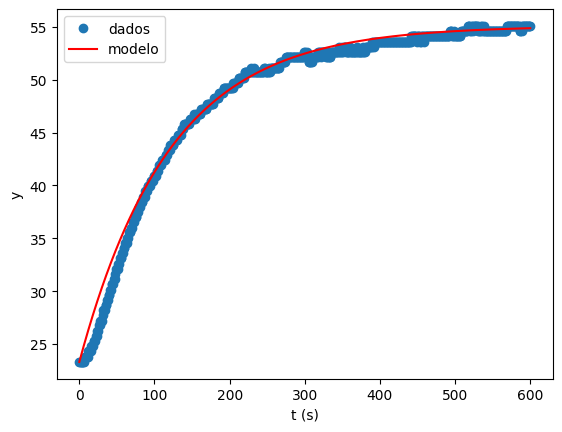

In [243]:
# Gráficos
plt.plot(t,y,'o')
plt.plot(t,ym,'r-')
plt.xlabel('t (s)')
plt.ylabel('y')
plt.legend(['dados','modelo'],loc='best')
plt.show()
#plt.savefig('grafico.png')

Comentário: 

# Sistema de Primeira Ordem - Otimização (S1) 

In [244]:
# Resposta do modelo
def modelo(x):
    K,tau = x
    ym = K*delta_u*(1-np.exp(-t/tau))+y[0]
    return ym

In [245]:
# Função objetivo: SSE
def obj(x):
    return np.sum((y-modelo(x))**2)    
    

SSE inicial:14076.110506129124


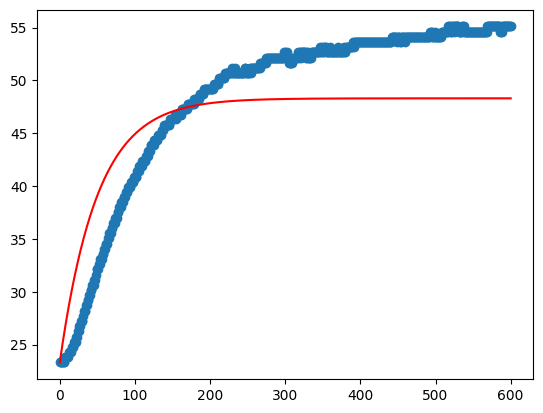

In [246]:
# Estimativa inicial
x0 = np.array([50,50])
# x0 = np.ones(2)*0.4
# print(x0)

# SSE inicial
print('SSE inicial:' + str(obj(x0)))

# Gráfico
plt.plot(t,y,'o')
plt.plot(t,modelo(x0),'r-')
plt.show()

K = 63.525089545707075
tau = 125.31592316978478
SSE: 396.66284739503794


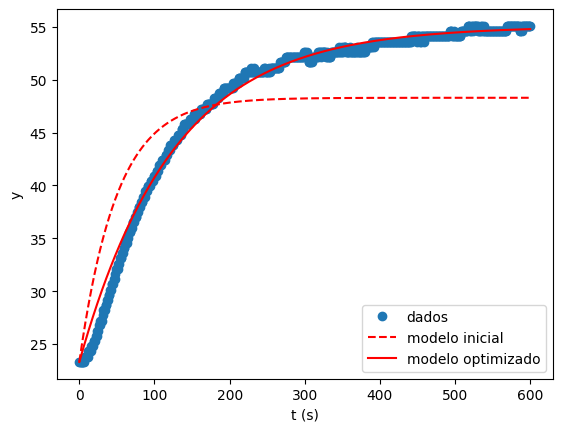

In [247]:
from scipy.optimize import minimize

# Optimização
sol = minimize(obj,x0)
xopt = sol.x
ym = modelo(xopt)

# Parâmetros optimizados
print('K = ' + str(xopt[0]))
print('tau = ' + str(xopt[1]))
print('SSE: ' + str(obj(xopt)))

# Gráficos
plt.plot(t,y,'o')
plt.plot(t,modelo(x0),'r--')
plt.plot(t,ym,'r-')
plt.xlabel('t (s)')
plt.ylabel('y')
plt.legend(['dados','modelo inicial','modelo optimizado'],loc='best')
plt.savefig('grafico.png')

In [248]:
# Tabela S1
print(f'T0: {y[0]} ºC')
print(f'Tss: {Tss} ºC') # media dos ultimos valores
print(f'delta_T: {delta_t} ºC')
print(f'K: {xopt[0]}') #otimizado
print(f'Tau: {xopt[1]} s')
print(f'SSE: {obj(xopt)}')

T0: 23.3 ºC
Tss: 54.88 ºC
delta_T: 31.580000000000002 ºC
K: 63.525089545707075
Tau: 125.31592316978478 s
SSE: 396.66284739503794


Comentário:

# Sistema de Primeira Ordem com Atraso - S2

In [249]:
dados = np.loadtxt('dados_S2.txt',delimiter=',')

t = dados[:,0]  # tempo
u = dados[:,1]*100  # entrada
y = dados[:,2]  # saída
mt = 0
i = 0

# Dados
# print(t)
print(u)
# print(y)

[50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50

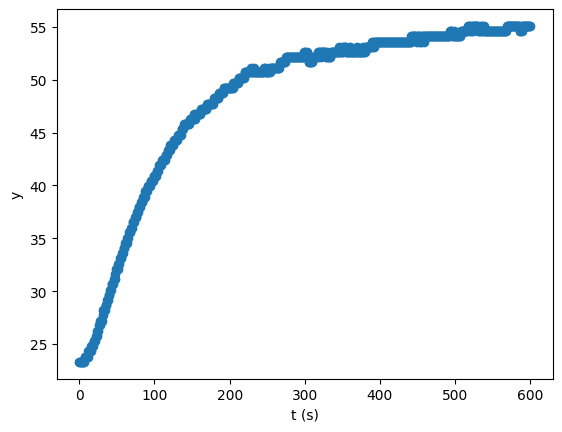

In [250]:
import matplotlib.pyplot as plt

# Gráfico
plt.plot(t,y,'o')
plt.xlabel('t (s)')
plt.ylabel('y')
plt.show()

Método de ajuste dos parâmetros do modelo, $K$ e $\tau$, usando o ponto correspondente a 63.2% da variação final da resposta ao degrau

In [251]:
delta_u = dados[1,1] #50% pwm
# print(delta_u)

yss_medio = np.mean(y[500:600])
# print(f'yss_medio: {yss_medio}')

# Ganho
K = (yss_medio-y[0])/delta_u

y63 = (y[len(y)-1]-y[0])*0.632+y[0]
y28 = (y[len(y)-1]-y[0])*0.283+y[0]

f = interp1d(y,t)
t2 = f(y63)
t1 = f(y28)

# Constante de tempo
tau = 3/2*(t2-t1)

# Constante de tempo de atraso
tauD = t2 - tau

Resposta do modelo de primeira ordem com atraso

$y(t)= \overline{y}_{[0,\tau_D]s}+K\Delta_u(1-e^{\frac{-(t-\tau_D)}{\tau}}) $
, $ t > \tau_D $  $ \newline$ $  y(t) = \overline{y}_{[0,\tau_D]s}   $, $ t\leq \tau_D $ 

In [252]:
# Recolha da media dos dados até tau segundos
#y0_medio = np.mean(y[0:20])
y0_medio = np.mean(y[0:round(tauD)])

ym = np.zeros(len(t))

for i in range(len(t)):
    if t[i] >= tauD :
        ym[i] = K*delta_u*(1-np.exp(-(t[i]-tauD)/tau))+y0_medio
    else:
        ym[i] = y0_medio

#ym = K*delta_u*(1-np.exp(-(t-tauD)/tau))+y0_medio

# SSE
desvio2 = (y-ym)**2
SSE = np.sum(desvio2)

**Alínea f)**


In [253]:
# Parametros

print(f'T0: {y[0]} ºC')
print(f'Tss: {Tss} ºC') # media dos ultimos valores
print(f'delta_T: {delta_t} ºC')
print('K = '+str(K))
print('tau = '+str(tau))
print('tauD = '+str(tauD))
print('SSE = '+str(SSE))


T0: 23.3 ºC
Tss: 54.88 ºC
delta_T: 31.580000000000002 ºC
K = 62.94000000000005
tau = 103.04460000000002
tauD = 17.050599999999974
SSE = 361.213988228077


**Alínea g)**

$ G(s) = \frac{Ke^{-\tau_D s}}{\tau s+1 } = \frac{0.222e^{-19.69s}}{233.89s+1} $

METER VALORES

**Alínea h)**

Gráfico com as duas curvas de temperatura: a do modelo e a do sistema térmico

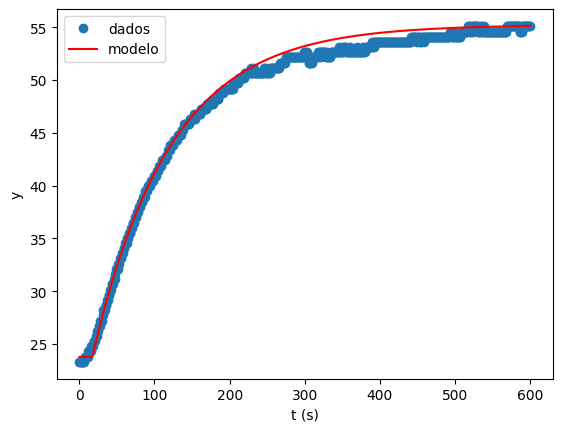

In [254]:
# gráficos
plt.plot(t,y,'o')
plt.plot(t,ym,'r-')
plt.xlabel('t (s)')
plt.ylabel('y')
plt.legend(['dados','modelo'],loc='best')

Comentário:

# Sistema de Primeira Ordem com Atraso - Otimização (S2) 

In [255]:
# Resposta do modelo
def modelo(x):
    K,tau = x
    y0_medio = np.mean(y[0:round(tauD)])

    ym = np.zeros(len(t))

    for i in range(len(t)):
        if t[i] > tauD :
            ym[i] = K*delta_u*(1-np.exp(-(t[i]-tauD)/tau))+y0_medio
        else:
            ym[i] = y0_medio
            
    return ym

In [256]:
# Função objetivo: SSE
def obj(x):
    return np.sum((y-modelo(x))**2)    
    

SSE inicial:9713.521535172738


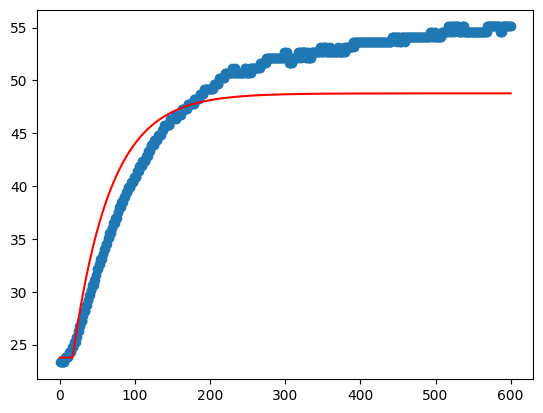

In [257]:
# Estimativa inicial
x0 = np.array([50,50])
# x0 = np.ones(2)*0.4
# print(x0)

# SSE inicial
print('SSE inicial:' + str(obj(x0)))

# Gráfico
plt.plot(t,y,'o')
plt.plot(t,modelo(x0),'r-')
plt.show()

K = 61.364520383303955
tau = 102.95525338432148
SSE: 97.75495311120676


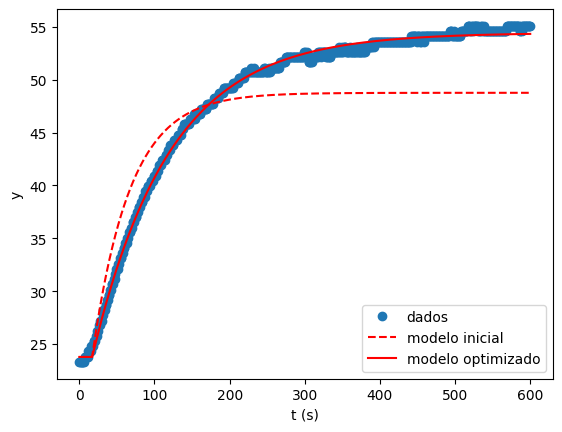

In [258]:
from scipy.optimize import minimize

# Optimização
sol = minimize(obj,x0)
xopt = sol.x
ym = modelo(xopt)

# Parâmetros optimizados
print('K = ' + str(xopt[0]))
print('tau = ' + str(xopt[1]))
print('SSE: ' + str(obj(xopt)))

# Gráficos
plt.plot(t,y,'o')
plt.plot(t,modelo(x0),'r--')
plt.plot(t,ym,'r-')
plt.xlabel('t (s)')
plt.ylabel('y')
plt.legend(['dados','modelo inicial','modelo optimizado'],loc='best')
plt.savefig('grafico.png')

In [259]:
# Tabela S2 otimizado
print(f'T0: {y[0]} ºC')
print(f'Tss: {Tss} ºC') # media dos ultimos valores
print(f'delta_T: {delta_t} ºC')
print(f'K: {xopt[0]}') 
print(f'Tau: {xopt[1]} s')
print(f'TauD: {xopt[1]} s') # taud ?????????????????
print(f'SSE: {obj(xopt)}')

my=1

T0: 23.3 ºC
Tss: 54.88 ºC
delta_T: 31.580000000000002 ºC
K: 61.364520383303955
Tau: 102.95525338432148 s
TauD: 102.95525338432148 s
SSE: 97.75495311120676


|  |  | 
| --- | --- |
| T<sub>0</sub> (ºC) | 23.3 | 
| T<sub>ss</sub> (ºC) | 54.88 | 

Comentário: